In [1]:
! git clone https://github.com/CoderBose/network-security-white-labelling.git

Cloning into 'network-security-white-labelling'...
remote: Enumerating objects: 456, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 456 (delta 50), reused 130 (delta 47), pack-reused 312
Receiving objects: 100% (456/456), 3.11 MiB | 13.85 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("/content/network-security-white-labelling/resources/walmart/walmart_smart_wifi_plugs_products_dataset.csv")
df = data[['product_id', 'product_name', 'brand', 'long_description',]]
df = df[df['brand']!="None"]

In [4]:
# 1. Top Products and Brands
top_n_products = df['product_name'].value_counts().head(5)
top_n_brands = df['brand'].value_counts().head(5)
print("\n Top Products:")
print(top_n_products)
print("\n Top Brands:")
print(top_n_brands)


 Top Products:
FOR Sonoff Wireless Socket Wifi Smart Plug S26 S26R2 APP Control for Smart Home                                      21
WiFi Smart Life Socket Plug Steckdosen Buchsen 16A Power metering Power metering                                     13
Smart WiFi Power Dimmer Plug 2 4 GHz WiFi Brightness Adjust Timer Socket                                             13
Tuya WIFI Smart Plug Digital Wattmeter Power Meter 220V AC Electricity Consumption EU Socket Power Kilowatt Meter    12
US Dual Smart Plug WiFi Outlet Extender Smartlife App Remote Control                                                 10
Name: product_name, dtype: int64

 Top Brands:
Gosund     17
BTOER      17
YIWEI      16
Mosiee     15
chenYun    14
Name: brand, dtype: int64


In [5]:
#2. Word Clouds
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

product_names_text = ' '.join(df['product_name'])
brand_names_text = ' '.join(str(df['brand']))


4. Word Cloud for Product Names:


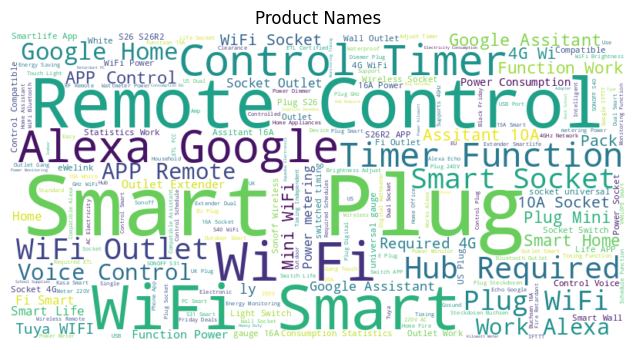

In [6]:
print("\n4. Word Cloud for Product Names:")
create_word_cloud(product_names_text, "Product Names")


4. Word Cloud for Brand Names:


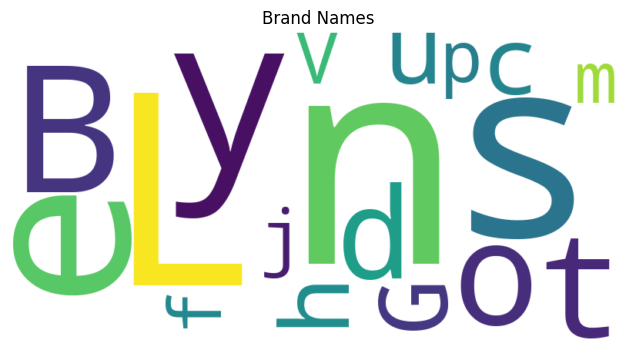

In [7]:
print("\n4. Word Cloud for Brand Names:")
create_word_cloud(brand_names_text, "Brand Names")

In [8]:
duplicate_product_names = df[df['product_name'].duplicated(keep=False)]['product_name']
print("\n6. Duplicate Product Names:")
print(duplicate_product_names)


6. Duplicate Product Names:
41      Clearance SUWHWEA Smart Plug Mini WiFi Outlet ...
43      2 Packs Smart Plug 10A 120V Mini WiFi Outlet T...
67      Gosund Smart Plug WiFi Smart Outlet Extender w...
68      Gosund Smart Plug WiFi Smart Outlet Extender w...
103     Mini Smart Plug WiFi Outlet Socket Works Alexa...
                              ...                        
1127    Tuya WIFI Smart Plug Digital Wattmeter Power M...
1128    Tuya WIFI Smart Plug Digital Wattmeter Power M...
1129    Tuya WIFI Smart Plug Digital Wattmeter Power M...
1130    Tuya WIFI Smart Plug Digital Wattmeter Power M...
1135    VALSEEL Smart Plug WiFi Outlet With Remote Con...
Name: product_name, Length: 395, dtype: object


In [9]:
# Total Brands having similar product names with different Brands
brand_per_product = df.groupby('product_name')['brand'].unique()
duplicate_product_names = brand_per_product[brand_per_product.apply(len) > 1]
print(len(duplicate_product_names))

46


In [12]:
# Product name that has been use by most of the brands
duplicate_product_names.to_frame()


,brand
product_name,
10A US Plug WIFI Wireless Remote Socket Smart Timer Plug Voice Control US Home Fire Retardant PC Smart Power Socket,"[Aubess, LuckyToU]"
20A US Plug WIFI Bluetooth Wireless Remote Socket Smart Timer Plug Voice Control US Home Fire Retardant PC Smart Power Socket,"[VASCWECD, HiSmartLife, Aubess]"
433mhz Wireless RF Remote Control Home Office for Smart WiFi Power Socket Outlet Single for Key US Plug,"[Weflink, POPLIS]"
95 Smart Wall Outlet 1 Gang Touch Switch Life APP Remote Control Voice Control Compatible Assistant Plug Standard,"[Tomshine, Owsoo]"
95 Wi Fi Smart Wall Outlet 1 Gang Touch Light Switch Life APP Remote Control Voice Control Compatible Assistant Plug Universal Pl,"[Dcenta, Andoer]"
95 Wi Fi Smart Wall Outlet With 1 Gang Touch Light Switch Life App Remote Control Voice Control Compatible Assistant Plug Standard,"[Meterk, TOMSHOO]"
95 Wi Fi Smart Wall Outlet With 2 Gang Touch Light Switch Life App Remote Control Voice Control Compatible Assistant Plug Universal Pl,"[Meterk, TOMSHOO]"
EU Plug WIFI Wireless Remote Socket Smart Timer Voice Control EU Home Fire Retardant PC Smart Power Socket With Meter Statistics Function,"[Liplasting, Aubess]"
Electric Outlet Wifi Smart Home Plug Convenient to Use and Easy to Install Widely Used for Different Application,"[Zoomarlous, ShineKing]"


In [13]:
# Top 10 brands that hame most of their product name common with other brands
n = []
for data in duplicate_product_names:
  n.extend(data)
df_n = pd.DataFrame({"brand":n})
df_n.value_counts().head(10)

brand    
YIWEI        7
BCLONG       7
BTOER        7
Weekend      6
Ceise        6
Girlsshop    6
Aubess       5
YaSaLy       5
Goodhd       5
Cogfs        5
dtype: int64